In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# let's load in our raw data, then we will do some base organization with it
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection")

sms_raw = pd.read_csv(data_path, delimiter='\t', header=None)
sms_raw.columns = ['spam', 'message']

In [11]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'immediate', 'action']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains( ' ' + str(key) + ' ', case=False)
    

In [4]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [6]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')

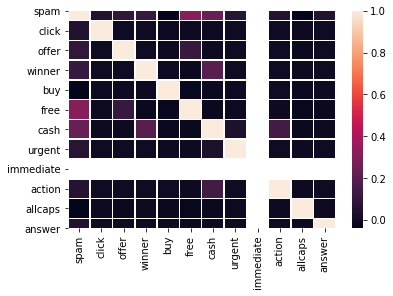

In [12]:
sns.heatmap(sms_raw.corr(), linewidths=.5)

In [13]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [21]:
# we will use a bernoulli naive bayes since our data is binary/boolean.
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
# instantiate our model and store i in a new variable.
bernoulli = BernoulliNB()

# fit our model to the data
bernoulli.fit(data, target)

# classify, storing the result in a new variable
y_prediction = bernoulli.predict(data)

# display our results
print("Number of mislabeled points out of a total {} points : {}".format(
data.shape[0],
(target != y_prediction).sum()
))

# check the accuracy of our model
print("Model accuracy (training data): ", accuracy_score(target, y_prediction))



Number of mislabeled points out of a total 5572 points : 603
Model accuracy (training data):  0.8917803302225413


In [ ]:
# 